# Random Forest Regression

In [1]:
# Import the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing as pre
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

In [2]:
# import data
data = pd.read_csv('Data matrix_gpd.csv') # 2401 data
#data = pd.read_csv('Datamatrix_two.csv') # 625 data

In [3]:
# # Regular data
# data = np.array(data)
# X = data[:, :3]
# y1 = data[:,4]
# y2 = data[:,5]

In [4]:
# Normalized data
data = pre.normalize(data)
X = data[:, :3]
y1 = data[:,4]
y2 = data[:,5]

In [5]:
# # Standardized data (Not Working)
# data = np.array(data)
# X = data[:, :3]
# X = pre.StandardScaler().fit(X)
# y1 = data[:,4]
# y2 = data[:,5]
# X.mean_


n_estimator =  130

For MFR: 
R_sq =  0.907333446686062
R_sq =  0.9282883775318121
R_sq =  0.9508697738532308
R_sq =  0.9375587859941968
R_sq =  0.9029201108978576
R_sq =  0.9459972172954504
R_sq Average =  0.9288279520431015

For LPD: 


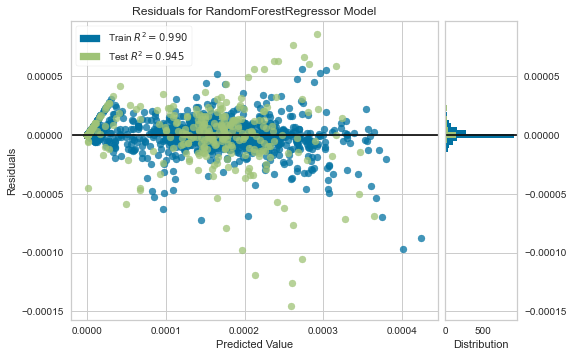

R_sq =  0.9773511315567186
R_sq =  0.9703708179147293
R_sq =  0.9668896043060093
R_sq =  0.9763023998200632
R_sq =  0.972129544294408
R_sq =  0.968071086417969
R_sq Average =  0.9718524307183163


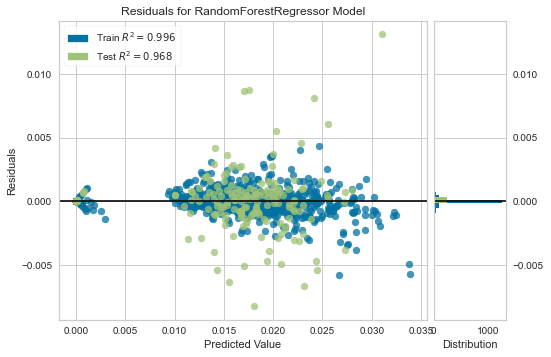

In [10]:
# Random Forest Regression
n_splits = 6
X_new = X

#Define variable n_estimators
#number = [1,5,10,15,30,60,100,130]
number = [130]

for n in number:
    print('\nn_estimator = ',n)
    #For MFR as y
    print('\nFor MFR: ')
    y_new = y1

    kf = KFold(n_splits = n_splits, shuffle = True)
    R_sqavg = 0

    for train_index, test_index in kf.split(X):

        #print("Train:", train_index, "Test:", test_index)
        X_train, X_test = X_new[train_index], X_new[test_index]
        y_train, y_test = y_new[train_index], y_new[test_index]

        ## Include all the below in the for loop to actually get the average
        #change n_estimators
        regressor = RandomForestRegressor(n_estimators = n, random_state = 0)
        regressor.fit(X_train, y_train) 
        y_pred = regressor.predict(X_test)
        for x in range(len(y_pred)):
            if y_pred[x] <=0:
                y_pred[x] = 0
        corr_matrix = np.corrcoef(y_test, y_pred)
        corr = corr_matrix[0,1]
        R_sq = corr**2
        print("R_sq = ", R_sq)
        R_sqavg = R_sqavg+R_sq
    R_sqavg = 1/n_splits*R_sqavg
    print("R_sq Average = ", R_sqavg)

    #For LPD as y
    print('\nFor LPD: ')
    y_new = y2

    kf = KFold(n_splits = n_splits, shuffle = True)
    R_sqavg = 0

    # Visualization
    visualizer = ResidualsPlot(regressor)

    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show()                 # Finalize and render the figure
    
    for train_index, test_index in kf.split(X):

        #print("Train:", train_index, "Test:", test_index)
        X_train, X_test = X_new[train_index], X_new[test_index]
        y_train, y_test = y_new[train_index], y_new[test_index]

        ## Include all the below in the for loop to actually get the average
        #change n_estimators
        regressor = RandomForestRegressor(n_estimators = n, random_state = 0)
        regressor.fit(X_train, y_train) 
        y_pred = regressor.predict(X_test)
        for x in range(len(y_pred)):
            if y_pred[x] <=0:
                y_pred[x] = 0
        corr_matrix = np.corrcoef(y_test, y_pred)
        corr = corr_matrix[0,1]
        R_sq = corr**2
        print("R_sq = ", R_sq)
        R_sqavg = R_sqavg+R_sq
    R_sqavg = 1/n_splits*R_sqavg
    print("R_sq Average = ", R_sqavg)

    # Visualization
    visualizer = ResidualsPlot(regressor)

    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show()                 # Finalize and render the figure
    

In [7]:
# # Visualization
# from sklearn.linear_model import Ridge
# from yellowbrick.datasets import load_concrete
# from yellowbrick.regressor import ResidualsPlot

# visualizer = ResidualsPlot(regressor)

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.show()                 # Finalize and render the figure